# Logistic Regression (로지스틱 회귀) & Assessment
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

##### ----------------------------------------------------------------------------------

# Data 확인

In [1]:
# 사용할 데이터: 타이타닉 dataset from kaggle
# Link: https://www.kaggle.com/c/titanic/data

# csv파일 불러오기
import pandas as pd
passengers = pd.read_csv("passengers.csv")

# 참고: csv 파일로 저장하는 법
# dataframe = pd.DataFrame(data)
# dataframe.to_csv("data_file_name.csv", header=True, index=False)
## 이때, to_csv() 괄호 안에 header=True, index=False 옵션으로 하는게 좋음. column명은 살려주고, 불필요한 index열은 없애기때문.

In [2]:
passengers.shape # (행, 열)

(891, 12)

In [3]:
passengers # 또는 passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
passengers.isnull().sum() # 결측치 확인: (Age 177명, Embarked 2명)

# 결측치 제거 방법:
# data.dropna(inplace=True) 으로 할 경우, 기존 data 내에서 결측치 제거 (새로운 객체 생성x)
# data_nonNA = data.dropna(inplace=False) 으로 할 경우, 결측치를 제거한 새로운 객체 생성

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 특정 feature에 따른 survived 비교 (0: 사망, 1: 생존) 함수
def bar_chart1(feature):
    survived = passengers[passengers['Survived']==1][feature].value_counts()
    dead = passengers[passengers['Survived']==0][feature].value_counts()
    df_survived = pd.DataFrame([survived,dead])
    df_survived.index = ['Survived','Dead']
    df_survived.plot(kind='bar',stacked=True, figsize=(10,5))
    
# bar_chart1('내가 비교하고싶은 column명') 을 코드로 입력하면, 생존비교 가능

#### 1차 전처리

In [2]:
# 'Cabin': 891명 중 687명(77.1%)이 결측치이므로, 해당 열 제거
# 'Ticket', 'Passengerid': 큰 의미가 없으므로, 해당 열 제거
passengers.drop(['Cabin', 'Ticket', 'PassengerId'], axis = 1, inplace = True) # axis=0: 행방향, axis=1: 열방향

# 이때, .drop() 괄호 안에 inplace 기능을 이용 가능
# data.drop(['Name'], axis=1, inplace=True) 으로 할 경우, 기존 data 내에서 열 제거 (새로운 객체 생성x)
# data_new = data.drop(['Name'], axis=1, inplace=False) 으로 할 경우, 해당 열 제거한 새로운 객체 생성

In [3]:
# 추가로, 본 실습에서는 편의상 'SibSp' (동반한 형제자매, 배우자수)와 'Parch'(동반한 부모, 자식 수)도 제거
# (본래는 이것들도 충분히 활용 가능)
passengers.drop(['SibSp', 'Parch'], axis = 1, inplace = True) # axis=0: 행방향, axis=1: 열방향

# 이때, .drop() 괄호 안에 inplace 기능을 이용 가능
# data.drop(['Name'], axis=1, inplace=True) 으로 할 경우, 기존 data 내에서 열 제거 (새로운 객체 생성x)
# data_new = data.drop(['Name'], axis=1, inplace=False) 으로 할 경우, 해당 열 제거한 새로운 객체 생성

In [9]:
passengers

,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C


In [4]:
# Name에서 Title만 떼어내기
for passenger in [passengers.copy()]:
    passenger['Title'] = passenger['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [11]:
passenger # passengers에서 Title이 추가된 dataset

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,Mr


In [5]:
# 불필요한 Name 열 제거
passenger.drop(['Name'], axis = 1, inplace = True) # axis=0: 행방향, axis=1: 열방향

# 이때, .drop() 괄호 안에 inplace 기능을 이용 가능
# data.drop(['Name'], axis=1, inplace=True) 으로 할 경우, 기존 data 내에서 열 제거 (새로운 객체 생성x)
# data_new = data.drop(['Name'], axis=1, inplace=False) 으로 할 경우, 해당 열 제거한 새로운 객체 생성

In [13]:
passenger

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,male,22.0,7.2500,S,Mr
1,1,1,female,38.0,71.2833,C,Mrs
2,1,3,female,26.0,7.9250,S,Miss
3,1,1,female,35.0,53.1000,S,Mrs
4,0,3,male,35.0,8.0500,S,Mr
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Rev
887,1,1,female,19.0,30.0000,S,Miss
888,0,3,female,NaN,23.4500,S,Miss
889,1,1,male,26.0,30.0000,C,Mr


In [14]:
passenger.isnull().sum() # 결측치 확인: (Age 177명, Embarked 2명)

# 결측치 제거 방법:
# data.dropna(inplace=True) 으로 할 경우, 기존 data 내에서 결측치 제거 (새로운 객체 생성x)
# data_nonNA = data.dropna(inplace=False) 으로 할 경우, 결측치를 제거한 새로운 객체 생성

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Title         0
dtype: int64

In [15]:
passenger["Survived"].value_counts() # 0: 사망, 1: 생존

0    549
1    342
Name: Survived, dtype: int64

In [16]:
passenger["Pclass"].value_counts() # 1: 1등석, 2: 2등석, 3: 3등석

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
passenger["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
passenger["Title"].value_counts() # Mr, Miss, Mrs, others로 구분하는게 편리할 것으로 보임

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Countess      1
Don           1
Mme           1
Sir           1
Jonkheer      1
Capt          1
Lady          1
Name: Title, dtype: int64

In [6]:
# Mr(0), Miss(1), Mrs(2), others(3)로 범주화
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }

for passenger in [passenger.copy()]:
    passenger['Title'] = passenger['Title'].map(title_mapping)

In [20]:
passenger

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,3
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,NaN,23.4500,S,1
889,1,1,male,26.0,30.0000,C,0


In [21]:
passenger["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [22]:
passenger["Embarked"].value_counts() # C : Cherbourg, Q : Queenstown, S : Southampton

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 2차 전처리

#### 결측치 (NA) 처리 : Age(177명)와 Embarked(2명)

In [7]:
# 'Embarked'에서 NA가 2개뿐 & 대부분(72.4%)이 'S'이므로, 결측치들도 S로 "대체"
passenger = passenger.fillna({"Embarked": "S"})

# 결측치 제거 방법: (아예 결측치는 그냥 없앨 수도 있다)
# data.dropna(inplace=True) 으로 할 경우, 기존 data 내에서 결측치 제거 (새로운 객체 생성x)
# data_nonNA = data.dropna(inplace=False) 으로 할 경우, 결측치를 제거한 새로운 객체 생성

In [24]:
passenger

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,3
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,NaN,23.4500,S,1
889,1,1,male,26.0,30.0000,C,0


In [8]:
# 'Age'를 각 'Title'에 대한 Age값의 중간값(median) 으로 채운다(Mr=0, Mrs=1, Miss=2, Others=3)
passenger['Age'].fillna(passenger.groupby('Title')['Age'].transform('median'), inplace=True)

# inplace=True: 기존 data 내에서 결측치 제거 (새로운 객체 생성x)
# inplace=False: 결측치를 제거한 새로운 객체 생성

In [26]:
passenger

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,3
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,21.0,23.4500,S,1
889,1,1,male,26.0,30.0000,C,0


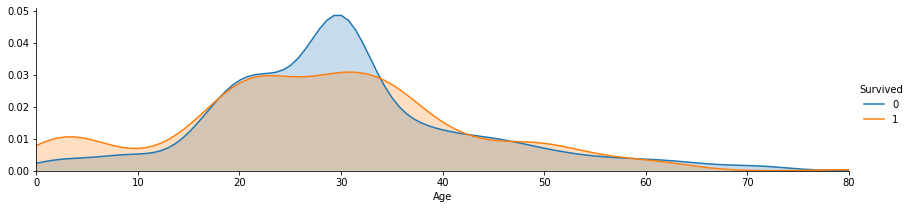

In [27]:
# Age(나이)에 따른 survived (0: 사망, 1: 생존)비교

import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(passenger, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, passenger['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

# 생존 유무를 통해 Age를 (10대, 20~30대, 40~50대, 60대 이상)으로 4가지 category로 구분해보자 

In [9]:
# Age 열을 categorical하게 변형

for passenger in [passenger]:
    passenger.loc[ passenger['Age'] < 20, 'Age']=0, # 10대
    passenger.loc[(passenger['Age'] >= 20) & (passenger['Age'] < 40), 'Age'] = 1, # 20-30대
    passenger.loc[(passenger['Age'] >= 40) & (passenger['Age'] < 60), 'Age'] = 2, # 40-50대
    passenger.loc[(passenger['Age'] >= 60), 'Age'] = 3 # 60대 이상
    
# 참고: Encoding categorical data (한 번에 문자형 categorical변수=nominal변수를 숫자로 바꾸는 방법)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data[:, 열번호] = le.fit_transform(data[:, 열번호])

In [29]:
passenger

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,male,1.0,7.2500,S,0
1,1,1,female,1.0,71.2833,C,2
2,1,3,female,1.0,7.9250,S,1
3,1,1,female,1.0,53.1000,S,2
4,0,3,male,1.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,1.0,13.0000,S,3
887,1,1,female,0.0,30.0000,S,1
888,0,3,female,1.0,23.4500,S,1
889,1,1,male,1.0,30.0000,C,0


#### 3차 전처리

In [30]:
# 특정 feature에 따른 survived 비교 (0: 사망, 1: 생존) 함수
def bar_chart2(feature):
    survived = passenger[passenger['Survived']==1][feature].value_counts()
    dead = passenger[passenger['Survived']==0][feature].value_counts()
    df_survived = pd.DataFrame([survived,dead])
    df_survived.index = ['Survived','Dead']
    df_survived.plot(kind='bar',stacked=True, figsize=(10,5))

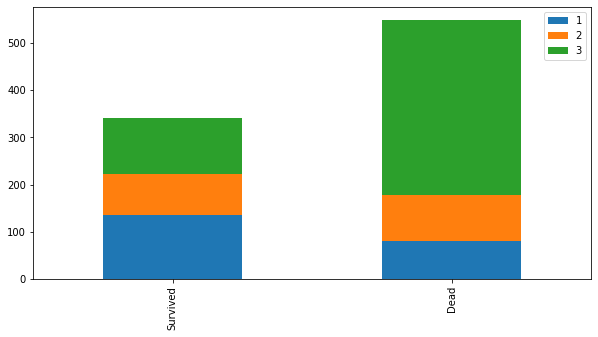

In [31]:
# Pclass에 따른 survived 차이
bar_chart2('Pclass') # 1등석일수록 생존하고, 3등석일수록 사망

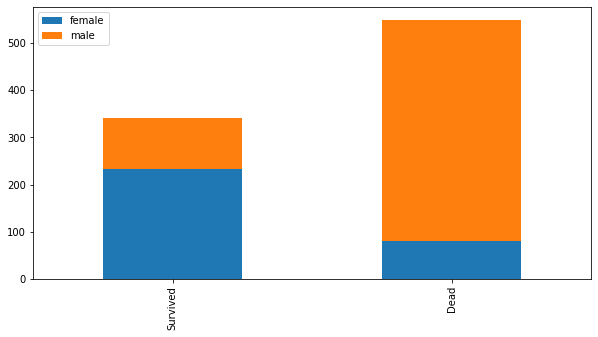

In [32]:
# Sex에 따른 survived 차이
bar_chart2('Sex') # 여성의 생존률이 높다.

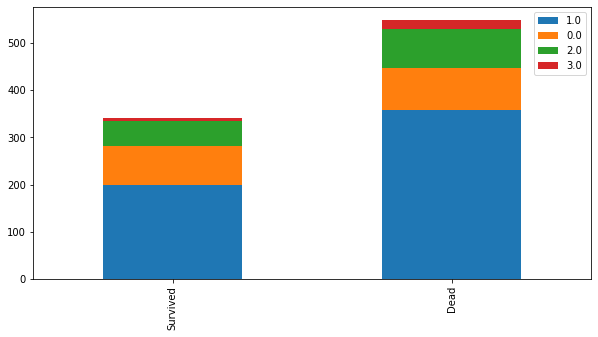

In [33]:
# Age에 따른 survived 차이
bar_chart2('Age') # 60대 이상이 확실히 사망률이 높다.

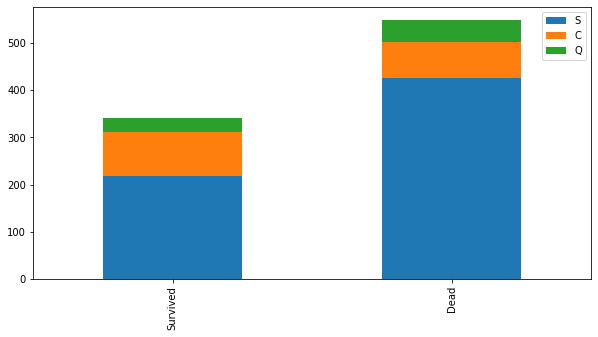

In [34]:
# Embarked에 따른 survived 차이
bar_chart2('Embarked')

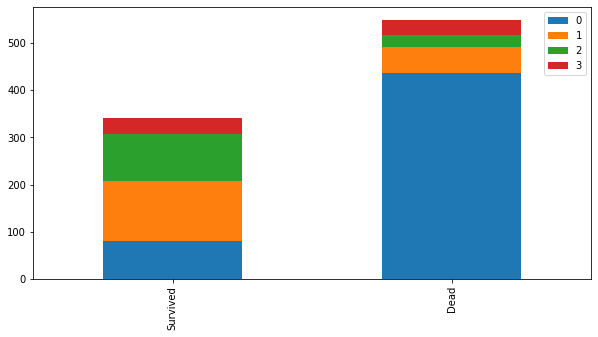

In [35]:
# Age에 따른 survived 차이
bar_chart2('Title') # 남성(Mr)의 사망률이 높다.

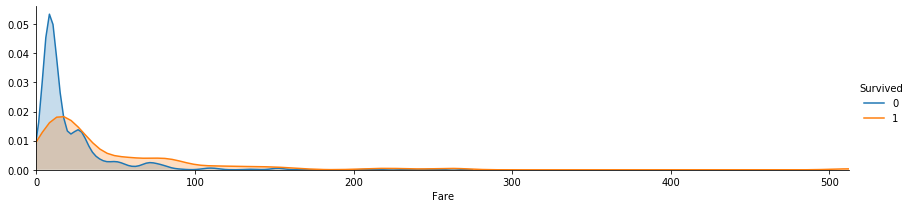

In [36]:
# Fare에 따른 survived 차이
facet2 = sns.FacetGrid(passenger, hue="Survived", aspect=4)
facet2.map(sns.kdeplot, 'Fare', shade=True)
facet2.set(xlim=(0, passenger['Fare'].max()))
facet2.add_legend()

plt.show() # 운임요금이 낮으면 사망률이 높다.

In [10]:
# 유의미하다고 생각되는 column 선택 (x=승선권클래스Pclass, 성별Sex, 운임요금Fare, y=생존여부Survived)
## 일부러 편의를 위해 y(target)을 맨 마지막에 작성
data = passenger.loc[:, ['Pclass', 'Sex', 'Fare', 'Survived'] ]

In [11]:
data

,Pclass,Sex,Fare,Survived
0,3,male,7.2500,0
1,1,female,71.2833,1
2,3,female,7.9250,1
3,1,female,53.1000,1
4,3,male,8.0500,0
...,...,...,...,...
886,2,male,13.0000,0
887,1,female,30.0000,1
888,3,female,23.4500,0
889,1,male,30.0000,1


In [12]:
#data.to_csv('titanic_data_clean.csv', index=False)

In [39]:
data['Fare'] = data['Fare']/100

In [40]:
data

,Pclass,Sex,Fare,Survived
0,3,male,0.072500,0
1,1,female,0.712833,1
2,3,female,0.079250,1
3,1,female,0.531000,1
4,3,male,0.080500,0
...,...,...,...,...
886,2,male,0.130000,0
887,1,female,0.300000,1
888,3,female,0.234500,0
889,1,male,0.300000,1


#### 4차 전처리

- Python에서 continuous가 아닌 경우 (categorical 변수), One-hot-Encoding (원핫인코딩)을 해주어야 한다.
- 단, binary 는 one-hot-encoding을 하지 않아도 된다.

In [41]:
type(data)

pandas.core.frame.DataFrame

In [42]:
import numpy as np
data_array = np.array(data)

In [43]:
# Encoding categorical data (한 번에 문자형 categorical변수=nominal변수를 숫자로 바꾸는 방법)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data_array[:, 열번호] = le.fit_transform(data_array[:, 열번호])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_array[:, 1] = le.fit_transform(data_array[:, 1]) # Sex: 문자이므로 알파벳순서로 female=0, male=1

In [44]:
data_array

array([[3, 1, 0.0725, 0],
       [1, 0, 0.7128329999999999, 1],
       [3, 0, 0.07925, 1],
       ...,
       [3, 0, 0.2345, 0],
       [1, 1, 0.3, 1],
       [3, 1, 0.0775, 0]], dtype=object)

In [45]:
# One Hot Encoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(), [열번호)], # The column numbers to be transformed (here is [0] but can be [0, 2, 4])
#     remainder='passthrough')                         # Leave the rest of the columns untouched
# data_array = np.array(ct.fit_transform(data_array), dtype=np.float)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [0])], # The column numbers to be transformed (here is [0] but can be [0, 2, 4])
    remainder='passthrough')                           # Leave the rest of the columns untouched

data_array = np.array(ct.fit_transform(data_array), dtype=np.float)


# LabelEncoder와 OneHotEncoder 2개 동시에 하려면.. from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [46]:
data_ohe = pd.DataFrame(data_array)

In [47]:
data_ohe

,0,1,2,3,4,5
0,0.0,0.0,1.0,1.0,0.072500,0.0
1,1.0,0.0,0.0,0.0,0.712833,1.0
2,0.0,0.0,1.0,0.0,0.079250,1.0
3,1.0,0.0,0.0,0.0,0.531000,1.0
4,0.0,0.0,1.0,1.0,0.080500,0.0
...,...,...,...,...,...,...
886,0.0,1.0,0.0,1.0,0.130000,0.0
887,1.0,0.0,0.0,0.0,0.300000,1.0
888,0.0,0.0,1.0,0.0,0.234500,0.0
889,1.0,0.0,0.0,1.0,0.300000,1.0


In [48]:
data_ohe.columns = ['Pclass_1', 'Pclass_2', 'Pclass_3',
                   'Sex_F0_M1',
                   'Fare',
                   'Survived']
# Pclass, Sex, Fare, Survived 가 기존 순서였으나, one-hot-encoding을 할 경우..
# one-hot-encoding이 진행된 변수들이 앞에서부터 순서대로 나온다.
# 이로 인해, one-hot-encoding이 진행안된 Sex, Fare, Survived가 뒤로 순서대로 밀려감

In [49]:
data_ohe

,Pclass_1,Pclass_2,Pclass_3,Sex_F0_M1,Fare,Survived
0,0.0,0.0,1.0,1.0,0.072500,0.0
1,1.0,0.0,0.0,0.0,0.712833,1.0
2,0.0,0.0,1.0,0.0,0.079250,1.0
3,1.0,0.0,0.0,0.0,0.531000,1.0
4,0.0,0.0,1.0,1.0,0.080500,0.0
...,...,...,...,...,...,...
886,0.0,1.0,0.0,1.0,0.130000,0.0
887,1.0,0.0,0.0,0.0,0.300000,1.0
888,0.0,0.0,1.0,0.0,0.234500,0.0
889,1.0,0.0,0.0,1.0,0.300000,1.0


In [50]:
# Pclass는 dummy변수가 2개면 충분하기 때문에, 하나를 제거. (reference = "Pclass_1")
data_ohe.drop(['Pclass_1'], axis = 1, inplace = True) # axis=0: 행방향, axis=1: 열방향

data_ohe
# 이때, .drop() 괄호 안에 inplace 기능을 이용 가능
# data.drop(['Name'], axis=1, inplace=True) 으로 할 경우, 기존 data 내에서 열 제거 (새로운 객체 생성x)
# data_new = data.drop(['Name'], axis=1, inplace=False) 으로 할 경우, 해당 열 제거한 새로운 객체 생성

,Pclass_2,Pclass_3,Sex_F0_M1,Fare,Survived
0,0.0,1.0,1.0,0.072500,0.0
1,0.0,0.0,0.0,0.712833,1.0
2,0.0,1.0,0.0,0.079250,1.0
3,0.0,0.0,0.0,0.531000,1.0
4,0.0,1.0,1.0,0.080500,0.0
...,...,...,...,...,...
886,1.0,0.0,1.0,0.130000,0.0
887,0.0,0.0,0.0,0.300000,1.0
888,0.0,1.0,0.0,0.234500,0.0
889,0.0,0.0,1.0,0.300000,1.0


In [51]:
# One-hot-encoding을 하는 다른 방법
# import pandas as pd
# pd.get_dummies(data['열 이름'])

# pd.get_dummies(data['열 이름'], prefix = '열 이름')  : 이렇게 할 경우, column앞에 열 이름이 들어가서 이해하기 더 쉽다

# 또한.. 위 처럼 원-핫 인코딩을 진행할 경우, 새로운 DataFrame이 생성되어 원-핫 인코딩이 적용되기 때문에
# 기존 DataFrame에 원-핫 인코딩한 컬럼을 반영해주기 위해서는 아래처럼 'columns' parameter를 따로 빼서 작성해주면 된다.
# data_new = pd.get_dummies(data = data이름, columns = ['열 이름'], prefix = '열 이름')

# pd.get_dummies(data, drop_first=True) : 이렇게 drop_first=True로 하면, 원핫인코딩된 열 중 첫번째 열들을 제거한다
## 왜냐하면, 가령 성별이 남/여라면, dummy변수는 1개면 충분, Pclass처럼 3가지 분류라면, dummy변수 2개면 충분하기 때문.

In [52]:
# Features for statsmodels
train_features_st = data_ohe[data_ohe.columns[:-1]]
train_features_st['intercept'] = 1 # intercept 추가 (statsmodels은 intercept 없는게 default)
train_features_st

# 또는
# train_features_intercept = sm.add_constant(data_ohe[data_ohe.columns[:-1]])
# train_features_intercept

,Pclass_2,Pclass_3,Sex_F0_M1,Fare,intercept
0,0.0,1.0,1.0,0.072500,1
1,0.0,0.0,0.0,0.712833,1
2,0.0,1.0,0.0,0.079250,1
3,0.0,0.0,0.0,0.531000,1
4,0.0,1.0,1.0,0.080500,1
...,...,...,...,...,...
886,1.0,0.0,1.0,0.130000,1
887,0.0,0.0,0.0,0.300000,1
888,0.0,1.0,0.0,0.234500,1
889,0.0,0.0,1.0,0.300000,1


In [53]:
# target for statsmodels
train_target_st = data_ohe[data_ohe.columns[-1]] # 또는 data_ohe['Survived']
train_target_st

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

### Imbalanced data 문제 해결 & Train:Validation 분리

In [54]:
# Under Sampling: Y값을 각각 {0, 1} 212명씩
## sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features_st, random_state=2021)
y_shuffled =sklearn.utils.shuffle(train_target_st, random_state=2021)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=2021).fit_resample(x_shuffled, y_shuffled)

In [55]:
y_resampled

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
679    1.0
680    1.0
681    1.0
682    1.0
683    1.0
Name: Survived, Length: 684, dtype: float64

In [56]:
import pandas as pd
print(pd.DataFrame(y_resampled)['Survived'].value_counts()) # Y열의 데이터 개수 확인

# 0: 'dead' (342명)
# 1: 'survived' (342명)

1.0    342
0.0    342
Name: Survived, dtype: int64


In [57]:
# train: validation = 7:3 분리
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 2021)

In [58]:
print(len(training_data))
print(len(training_labels))

print(len(validation_data))
print(len(validation_labels))

478
478
206
206


# Modeling

In [59]:
import statsmodels.api as sm
model_sm = sm.Logit(training_labels, training_data) #로지스틱 회귀분석 시행
fit_result_sm = model_sm.fit()

Optimization terminated successfully.
         Current function value: 0.468416
         Iterations 6


In [60]:
fit_result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  478
Model:                          Logit   Df Residuals:                      473
Method:                           MLE   Df Model:                            4
Date:                Sat, 17 Apr 2021   Pseudo R-squ.:                  0.3235
Time:                        00:35:12   Log-Likelihood:                -223.90
converged:                       True   LL-Null:                       -330.99
Covariance Type:            nonrobust   LLR p-value:                 3.375e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass_2      -0.9534      0.393     -2.424      0.015      -1.724      -0.183
Pclass_3      -1.9151      0.366     -5.234      0.000      -2.632      -1.198
Sex_F0_M1     -2.6006      0.252    -10.331      0.000      -3.094      -2.107
Fare           0.2687      0.325      0.826      0.409      -0.369       0.906
intercept      2.8182      0.416      6.779      0.000       2.003       3.633
==============================================================================
"""

In [61]:
# Odds ratio
import numpy as np
np.exp(fit_result_sm.params)

## reference: (Pclass=1, Sex=Female)
## intercept는 Odds ratio 해석 x

Pclass_2      0.385429
Pclass_3      0.147325
Sex_F0_M1     0.074227
Fare          1.308293
intercept    16.746217
dtype: float64

In [62]:
# Probability 값 in train
fit_result_sm.predict(training_data)
# 기존 data에 pbrobablity값을 추가하고 싶다면?
# data_ohe["predict_prob"] = fit_result_sm.predict(train_features_st)

521    0.952772
494    0.341205
450    0.873762
118    0.157348
344    0.869661
         ...   
621    0.874280
128    0.157520
57     0.339395
341    0.577602
116    0.157578
Length: 478, dtype: float64

In [63]:
# Probability 값 in validation
predict_probability_valid_y = fit_result_sm.predict(validation_data)
predict_probability_valid_y

90     0.686948
464    0.958538
293    0.157341
106    0.157526
445    0.953663
         ...   
35     0.157341
89     0.157278
454    0.590619
374    0.157633
253    0.571724
Length: 206, dtype: float64

In [64]:
# 경계값cut off value에 따라 0,1 값 변환
def change_cutoff(pred_prob_y, cutoff):
    Y_change = pred_prob_y.copy()
    Y_change[Y_change > cutoff] = 1
    Y_change[Y_change <= cutoff] = 0
    return(Y_change.astype(int))

In [66]:
pred_y_05 = change_cutoff(predict_probability_valid_y, 0.5)
pred_y_05

90     1
464    1
293    0
106    0
445    1
      ..
35     0
89     0
454    1
374    0
253    1
Length: 206, dtype: int32

In [67]:
pred_y_07 = change_cutoff(predict_probability_valid_y, 0.7)
pred_y_07

90     0
464    1
293    0
106    0
445    1
      ..
35     0
89     0
454    0
374    0
253    0
Length: 206, dtype: int32

# Assessment

In [68]:
# Confusion Matrix 방법1
# from sklearn.metrics import confusion_matrix
# confusion_matrix(validation_labels, model.predict(validation_data))
## 여기서 model은 fit_result_sm 또는 fit_result_skl
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels, pred_y_05)

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

array([[83, 29],
       [18, 76]], dtype=int64)

In [70]:
# Confusion Matrix 방법2
import numpy as np
import pandas as pd
y_actu = pd.Series(validation_labels, name='Actual') # validation_labels는 array형태여야함
y_pred_05 = pd.Series(pred_y_05, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred_05)

df_confusion

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

Predicted,0,1
Actual,,
0.0,83,29
1.0,18,76


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy: {0: .4f}'.format(accuracy_score(validation_labels, pred_y_05)))
print('precision: {0: .4f}'.format(precision_score(validation_labels, pred_y_05)))
print('recall: {0: .4f}'.format(recall_score(validation_labels, pred_y_05)))
print('f1_score: {0: .4f}'.format(f1_score(validation_labels, pred_y_05)))
print('AUC: {0: .4f}'.format(roc_auc_score(validation_labels, pred_y_05)))

Accuracy:  0.7718
precision:  0.7238
recall:  0.8085
f1_score:  0.7638
AUC:  0.7748


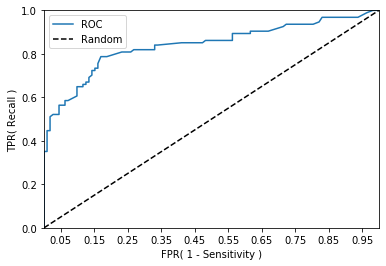

In [73]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  
roc_curve_plot(validation_labels, predict_probability_valid_y)

# 아까 modeling에서 predict_probability_valid_y = fit_result_sm.predict(validation_data) 을 했음

- cutoff = 0.7로 한 경우

In [74]:
# Confusion Matrix 방법2
import numpy as np
import pandas as pd
y_actu = pd.Series(validation_labels, name='Actual') # validation_labels는 array형태여야함
y_pred_07 = pd.Series(pred_y_07, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred_07)

df_confusion

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

Predicted,0,1
Actual,,
0.0,101,11
1.0,33,61


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy: {0: .4f}'.format(accuracy_score(validation_labels, pred_y_07)))
print('precision: {0: .4f}'.format(precision_score(validation_labels, pred_y_07)))
print('recall: {0: .4f}'.format(recall_score(validation_labels, pred_y_07)))
print('f1_score: {0: .4f}'.format(f1_score(validation_labels, pred_y_07)))
print('AUC: {0: .4f}'.format(roc_auc_score(validation_labels, pred_y_07)))

Accuracy:  0.7864
precision:  0.8472
recall:  0.6489
f1_score:  0.7349
AUC:  0.7754


# 부록 Appendix

### K-fold CV

##### sklearn 활용

In [159]:
# x(features), y(target) 나누기
import numpy as np
train_features = np.array(data_ohe)[:,:-1]
train_target = np.array(data_ohe)[:,-1]

In [160]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_skl = LogisticRegression() # 괄호 안에 옵션으로 "Max_iter : solver에 대한 최대 반복 횟수" 활용가능. (ex: max_iter=500 )
fit_result_skl = model_skl.fit(train_features, train_target)

In [161]:
print(model_skl.intercept_) # intercept
print(model_skl.coef_) # coefficient: class_2, Pclass_3, Sex_F0_M1, Fare

# Logit(Survived=1) = 1.95799012 -0.60800514*Pclass_2 -1.63590064*Pclass_3 -2.51575467*Sex_F0_M1 + 0.24054743*Fare

## reference: (Pclass=1, Sex=Female)

[1.95799012]
[[-0.60800514 -1.63590064 -2.51575467  0.24054743]]


In [162]:
print(model_skl.predict_proba(train_features)) # 0=사망, 1=생존 : 각 관측치별..[0(사망)일 확률, 1(생존)일 확률]

[[0.89809414 0.10190586]
 [0.10626624 0.89373376]
 [0.41552946 0.58447054]
 ...
 [0.40648925 0.59351075]
 [0.61906943 0.38093057]
 [0.89798402 0.10201598]]


#### statsmodels 활용

In [163]:
# Features for statsmodels
train_features_st = data_ohe[data_ohe.columns[:-1]]
train_features_st['intercept'] = 1 # intercept 추가 (statsmodels은 intercept 없는게 default)
train_features_st

# 또는
# train_features_intercept = sm.add_constant(data_ohe[data_ohe.columns[:-1]])
# train_features_intercept

,Pclass_2,Pclass_3,Sex_F0_M1,Fare,intercept
0,0.0,1.0,1.0,0.072500,1
1,0.0,0.0,0.0,0.712833,1
2,0.0,1.0,0.0,0.079250,1
3,0.0,0.0,0.0,0.531000,1
4,0.0,1.0,1.0,0.080500,1
...,...,...,...,...,...
886,1.0,0.0,1.0,0.130000,1
887,0.0,0.0,0.0,0.300000,1
888,0.0,1.0,0.0,0.234500,1
889,0.0,0.0,1.0,0.300000,1


In [164]:
# target for statsmodels
train_target_st = data_ohe[data_ohe.columns[-1]] # 또는 data_ohe['Survived']
train_target_st

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [165]:
import statsmodels.api as sm
model_sm = sm.Logit(train_target_st, train_features_st) #로지스틱 회귀분석 시행
fit_result_sm = model_sm.fit()

Optimization terminated successfully.
         Current function value: 0.463592
         Iterations 6


In [166]:
fit_result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                  0.3038
Time:                        13:03:44   Log-Likelihood:                -413.06
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.314e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass_2      -0.7366      0.271     -2.717      0.007      -1.268      -0.205
Pclass_3      -1.7903      0.252     -7.111      0.000      -2.284      -1.297
Sex_F0_M1     -2.6246      0.185    -14.170      0.000      -2.988      -2.262
Fare           0.1815      0.210      0.864      0.388      -0.230       0.594
intercept      2.1476      0.278      7.716      0.000       1.602       2.693
==============================================================================
"""

In [167]:
fit_result_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.304     
Dependent Variable: Survived         AIC:              836.1202  
Date:               2021-04-15 13:03 BIC:              860.0819  
No. Observations:   891              Log-Likelihood:   -413.06   
Df Model:           4                LL-Null:          -593.33   
Df Residuals:       886              LLR p-value:      9.3144e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass_2     -0.7366    0.2711   -2.7174  0.0066  -1.2678  -0.2053
Pclass_3     -1.7903    0.2518   -7.1111  0.0000  -2.2838  -1.2969
Sex_F0_M1    -2.6246    0.1852  -14.1701  0.0000  -2.9877  -2.2616
Fare          0.1815    0.2102    0.8636  0.3878  -0.2305   0.5935
intercept     2.1476    0.2783    7.7159  0.0000   1.6020   2.6931
=================================================================

"""

In [168]:
# Logit(Survived=1) = 2.1476 -0.7366*Pclass_2 -1.7903*Pclass_3 -2.6246*Sex_F0_M1 + 0.1815*Fare

## reference: (Pclass=1, Sex=Female)

In [173]:
# Odds ratio
import numpy as np
np.exp(fit_result_sm.params)

## reference: (Pclass=1, Sex=Female)

Pclass_2     0.478749
Pclass_3     0.166905
Sex_F0_M1    0.072465
Fare         1.199061
intercept    8.563887
dtype: float64

In [174]:
# Probability 값
fit_result_sm.predict(train_features_st)
# 기존 data에 pbrobablity값을 추가하고 싶다면?
# data_ohe["predict_prob"] = fit_result_sm.predict(train_features_st)

0      0.094982
1      0.906951
2      0.591848
3      0.904127
4      0.095107
         ...   
886    0.233246
887    0.900430
888    0.598639
889    0.395887
890    0.095061
Length: 891, dtype: float64

In [185]:
from sklearn.model_selection import cross_val_score # 1개 measure만 사용가능
from sklearn.model_selection import cross_validate # 한 번에 여러개의 measure 구하기 가능
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

model_skl_cv = LogisticRegression() # 괄호 안에 옵션으로 "Max_iter : solver에 대한 최대 반복 횟수" 활용가능. (ex: max_iter=500 )
# model_sm_cv = sm.Logit(train_target_st, train_features_st) #로지스틱 회귀분석 시행

kfold = KFold(n_splits=10, shuffle=True, random_state=2021) # K-Fold 객체 생성 (여기서는 k=10), shuffle 꼭 해주기
st_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2021) # stratified K-Fold 객체 생성


# sklearn 관련 (cross-validation, measure) 추가 학습 링크:
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [178]:
# k-fold CV
# Accuracy 기준: cross_val_score(model, featrues, target, cross validation)

scores = cross_val_score(model_skl_cv, train_features, train_target, cv=kfold) # model, featrues, target, cross validation
print('n_splits={}, cross validation score: {}'.format(10, scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))
# stratified k-fold cross-validation

n_splits=10, cross validation score: [0.7        0.75280899 0.87640449 0.69662921 0.76404494 0.78651685
 0.88764045 0.78651685 0.76404494 0.80898876]
cross-val-score.mean 
0.782


In [181]:
# Stratified k-fold CV
# Accuracy 기준: cross_val_score(model, featrues, target, cross validation)

scores = cross_val_score(model_skl_cv, train_features, train_target, cv=st_kfold) # model, featrues, target, cross validation
print('n_splits={}, cross validation score: {}'.format(10, scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))


n_splits=10, cross validation score: [0.81111111 0.80898876 0.79775281 0.80898876 0.82022472 0.74157303
 0.7752809  0.75280899 0.79775281 0.73033708]
cross-val-score.mean 
0.784


In [198]:
# Stratified k-fold CV
# Accuracy 기준: cross_val_score(model, featrues, target, cross validation)
many_scores = cross_validate(model_skl_cv, train_features, train_target, cv=st_kfold,
                        scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc']) # (model, featrues, target, cross validation)
many_scores
# 각 cv마다 dataset 뽑기 가능한지 - 혼동행렬
# 혼동행렬 여러가지 기준으로 성능평가 가능한지


# scoring에 쓰기 유용한 것들: 'accuracy', 'roc_auc', 'balanced_accuracy', 'f1', 'f1_weighted', 'recall', 'precision'

{'fit_time': array([0.01097059, 0.00598383, 0.00498557, 0.00598383, 0.00498676,
        0.004987  , 0.004987  , 0.00598454, 0.00299263, 0.00498676]),
 'score_time': array([0.02692699, 0.00598454, 0.00698161, 0.00498605, 0.00498629,
        0.00498652, 0.00498629, 0.00398898, 0.00498629, 0.00498652]),
 'test_accuracy': array([0.81111111, 0.80898876, 0.79775281, 0.80898876, 0.82022472,
        0.74157303, 0.7752809 , 0.75280899, 0.79775281, 0.73033708]),
 'test_recall': array([0.68571429, 0.67647059, 0.73529412, 0.73529412, 0.64705882,
        0.64705882, 0.67647059, 0.70588235, 0.70588235, 0.65714286]),
 'test_precision': array([0.8       , 0.79310345, 0.73529412, 0.75757576, 0.84615385,
        0.66666667, 0.71875   , 0.66666667, 0.75      , 0.65714286]),
 'test_f1': array([0.73846154, 0.73015873, 0.73529412, 0.74626866, 0.73333333,
        0.65671642, 0.6969697 , 0.68571429, 0.72727273, 0.65714286]),
 'test_roc_auc': array([0.84597403, 0.85882353, 0.83770053, 0.83770053, 0.83983957,
 

In [199]:
print("accuracy mean=", many_scores['test_accuracy'].mean())
print("recall mean=", many_scores['test_recall'].mean())
print("precision mean=", many_scores['test_precision'].mean())
print("f1 mean=", many_scores['test_f1'].mean())
print("AUC mean=", many_scores['test_roc_auc'].mean())

# 참고: misclassification rate (오분류율) = 1 - accuracy = error rate

accuracy mean= 0.784481897627965
recall mean= 0.6872268907563026
precision mean= 0.7391353360128716
f1 mean= 0.7107332361327094
AUC mean= 0.8374234218940101


- 기타 더 다양한 measure (scoring = ) 를 찾을 수 있는 링크:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

참고:

https://computer-nerd.tistory.com/49

https://m.blog.naver.com/PostView.nhn?blogId=rising_n_falling&logNo=221631637822&proxyReferer=https:%2F%2Fwww.google.com%2F



https://writeren.tistory.com/68

https://writeren.tistory.com/77

https://jfun.tistory.com/136

https://jfun.tistory.com/137




https://talkingaboutme.tistory.com/entry/ML-Categorical-Variable%EC%9D%84-%EC%88%98%EC%B9%98%ED%99%94%EC%8B%9C%ED%82%A4%EA%B8%B0

http://growthj.link/python-%EC%9B%90-%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9one-hot-encoding-%EC%A0%95%EB%A6%AC-get_dummies/

https://datascience.stackexchange.com/questions/41113/deprecationwarning-the-categorical-features-keyword-is-deprecated-in-version



https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221643578115&proxyReferer=https:%2F%2Fwww.google.com%2F

https://jihoonjung.tistory.com/18

https://todayisbetterthanyesterday.tistory.com/11


http://hleecaster.com/ml-logistic-regression-example/

https://todayisbetterthanyesterday.tistory.com/11

https://www.inflearn.com/questions/33635

https://3months.tistory.com/28

https://dacon.io/competitions/open/235539/codeshare/1215?page=1&dtype=recent

https://no17.tistory.com/202

https://blog.naver.com/PostView.nhn?blogId=eqfq1&logNo=221450974703&proxyReferer=https:%2F%2Fwww.google.com%2F

https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221698612004&proxyReferer=https:%2F%2Fwww.google.com%2F


https://velog.io/@sset2323/03-05.-ROC-%EA%B3%A1%EC%84%A0%EA%B3%BC-AUC


https://www.python2.net/questions-318864.htm



https://woolulu.tistory.com/70

https://writeren.tistory.com/93

https://scikit-learn.org/stable/modules/cross_validation.html

https://davinci-ai.tistory.com/18

https://studychfhd.tistory.com/225

https://velog.io/@skyepodium/K-Fold-%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D

https://dlearner.tistory.com/23

https://homeproject.tistory.com/entry/%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D-cross-validation

https://riverzayden.tistory.com/13

https://statkclee.github.io/model/model-python-cross-validation.html#1_%ED%8B%B1%ED%83%9D%ED%86%A0_%EC%98%88%EC%B8%A1%EB%AA%A8%ED%98%95_%EC%8B%9C%EC%9A%B4%EC%A0%84
